In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme="chesterish")
pd.options.display.max_rows = 100

### Row data.csv

In [4]:
root_dir = os.path.dirname(os.getcwd())
data_clean = pd.read_csv("{}/data/data_E1_500temp.csv".format(root_dir))
data_clean.head()

,subject_id,rt,stimulus,trial_type,time_elapsed,gender,age,language,country,sampling,turkcode,nb_of_run,responses,stim_type,length,state_OR_event,branch_first,time_interval,node_selected
0,1,NaN,instruction,image-button-response,16783,male,29,English,United States of America,Right,R568084887600gxrw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,instruction,causal-graph1,30108,male,29,English,United States of America,Right,R568084887600gxrw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,NaN,instruction,causal-graph1,139781,male,29,English,United States of America,Right,R568084887600gxrw,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,NaN,instruction,causal-graph1,142755,male,29,English,United States of America,Right,R568084887600gxrw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,NaN,instruction,causal-graph1,330315,male,29,English,United States of America,Right,R568084887600gxrw,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Demographical data only

In [3]:
data_demog = data_clean[["subject_id","gender","age","language","country","turkcode"]]
data_demog = data_demog.drop_duplicates()
data_demog

,subject_id,gender,age,language,country,turkcode
0,1,male,29,English,United States of America,R568084887600gxrw
25,2,male,33,english,United States of America,R564700337210gxrw
74,3,male,52,English,United States of America,R569457007290gxrw
147,4,male,30,English,United States of America,R565583967120gxrw
172,5,male,30,English,United States of America,R568127437130gxrw
197,6,male,34,english,United States of America,R563291027570gxrw
222,7,male,30,English,United States of America,R564578077900gxrw
255,8,male,26,English,United States of America,R563823157740gxrw
288,9,male,30,English,United States of America,R563954487180gxrw
313,10,male,31,english,American Samoa,R561552147430gxrw


### Target stimuli only (instructions deleted)

In [4]:
data = data_clean[["subject_id","rt","stimulus","trial_type","sampling","nb_of_run","stim_type","length","state_OR_event",
                   "branch_first","time_interval","node_selected"]]
data = data[data["stimulus"] != "instruction"].drop(['trial_type'],axis=1)
data.reset_index(drop=True,inplace=True)

data.head()

,subject_id,rt,stimulus,sampling,nb_of_run,stim_type,length,state_OR_event,branch_first,time_interval,node_selected
0,1,22620.305,chain_RL,Right,1.0,Chain,Long,NaN,NaN,NaN,node7
1,1,23863.120,branch_RTLE1,Right,1.0,AND_Gate,Long,Event,Top,Short,node12
2,1,10390.475,branch_RBSS,Right,1.0,AND_Gate,Short,State,Bottom,NaN,node15
3,1,14482.460,branch_RTSE3,Right,1.0,AND_Gate,Short,Event,Top,Long,node14
4,1,30929.865,branch_RTLE2,Right,1.0,AND_Gate,Long,Event,Top,Medium,node14


### Chain only

In [5]:
data_chain = data[data["stim_type"]=="Chain"].drop(["stim_type","state_OR_event","branch_first","time_interval"],axis=1)
data_chain.reset_index(drop=True,inplace=True)
data_chain["stimulus"] = data_chain["stimulus"].astype("category")
data_chain["sampling"] = data_chain["sampling"].astype("category")
data_chain["length"] = data_chain["length"].astype("category")
data_chain.head()

,subject_id,rt,stimulus,sampling,nb_of_run,length,node_selected
0,1,22620.305,chain_RL,Right,1.0,Long,node7
1,1,30747.455,chain_RM,Right,1.0,Medium,node7
2,1,12595.985,chain_RS,Right,1.0,Short,node8
3,2,46211.535,chain_LL,Left,1.0,Long,node2
4,2,10868.255,chain_LM,Left,1.0,Medium,node2


### AND-Gate only

In [6]:
data_AND_Gate = data[data["stim_type"]=="AND_Gate"].drop(["stim_type"],axis=1)
data_AND_Gate.reset_index(drop=True,inplace=True)
data_AND_Gate["stimulus"] = data_AND_Gate["stimulus"].astype("category")
data_AND_Gate["state_OR_event"] = data_AND_Gate["state_OR_event"].astype("category")
data_AND_Gate["sampling"] = data_AND_Gate["sampling"].astype("category")
data_AND_Gate["length"] = data_AND_Gate["length"].astype("category")
data_AND_Gate["branch_first"] = data_AND_Gate["branch_first"].astype("category")
data_AND_Gate["time_interval"] = data_AND_Gate["time_interval"].astype("category")
data_AND_Gate["nb_of_run"] = data_AND_Gate["nb_of_run"].astype("category")
data_AND_Gate.head()

,subject_id,rt,stimulus,sampling,nb_of_run,length,state_OR_event,branch_first,time_interval,node_selected
0,1,23863.120,branch_RTLE1,Right,1.0,Long,Event,Top,Short,node12
1,1,10390.475,branch_RBSS,Right,1.0,Short,State,Bottom,NaN,node15
2,1,14482.460,branch_RTSE3,Right,1.0,Short,Event,Top,Long,node14
3,1,30929.865,branch_RTLE2,Right,1.0,Long,Event,Top,Medium,node14
4,1,15376.405,branch_RBME1,Right,1.0,Medium,Event,Bottom,Short,node14


In [7]:
data_AND_Gate['nb_of_run'].value_counts(normalize=True)*100

1.0    94.827586
2.0     3.735632
3.0     0.862069
4.0     0.574713
Name: nb_of_run, dtype: float64

### General functions

In [8]:
def chain_node_cat(length,node):
    node =  int(node[-1])
    short = {'INACT':[1,2,3,4,5,6],'ROIMDT':[7],'EFFECT':[8]}
    medium = {'INACT':[1,2,3,4],'ROOT':[5],'INBTW':[6],'IMDT':[7],'EFFECT':[8]}
    long = {'INACT':[1,2],'ROOT':[3],'INBTW':[4,5,6],'IMDT':[7],'EFFECT':[8]}
    category = [cat for cat,nd in (short if length == 'Short' else medium if length == 'Medium' 
                                   else long).items() if node in nd][0]
    
    return category

def branch_node_cat(length,node,first):
    node = int(node[-1]) if len(node) == 5 else int(node[-2:])
    short_top = {'INACT_1st':[1,2,3,4,5,6],'INACT_2nd':[8,9,10,11,12,13],'ROOIMDT_1st':[7],'ROOIMDT_2nd':[14],'EFFECT':[15]}
    short_bot = {'INACT_1st':[8,9,10,11,12,13],'INACT_2nd':[1,2,3,4,5,6],'ROOIMDT_1st':[14],'ROOIMDT_2nd':[7],'EFFECT':[15]}
    medium_top = {'INACT_1st':[1,2,3,4],'INACT_2nd':[8,9,10,11],'ROOT_1st':[5],'ROOT_2nd':[12],'INBTW_1st':[6],'INBTW_2nd':[13],
                  'IMDT_1st':[7],'IMDT_2nd':[14],'EFFECT':[15]}
    medium_bot = {'INACT_1st':[8,9,10,11],'INACT_2nd':[1,2,3,4],'ROOT_1st':[12],'ROOT_2nd':[5],'INBTW_1st':[13],'INBTW_2nd':[6],
                  'IMDT_1st':[14],'IMDT_2nd':[7],'EFFECT':[15]}
    long_top = {'INACT_1st':[1,2],'INACT_2nd':[8,9],'ROOT_1st':[3],'ROOT_2nd':[10],'INBTW_1st':[4,5,6],'INBTW_2nd':[11,12,13],
                  'IMDT_1st':[7],'IMDT_2nd':[14],'EFFECT':[15]}
    long_bot = {'INACT_1st':[8,9],'INACT_2nd':[1,2],'ROOT_1st':[10],'ROOT_2nd':[3],'INBTW_1st':[11,12,13],'INBTW_2nd':[4,5,6],
                  'IMDT_1st':[14],'IMDT_2nd':[7],'EFFECT':[15]}
    if length == 'Short':
        category = [cat for cat,nd in (short_top if first == 'Top' else short_bot).items() if node in nd][0]
    elif length == 'Medium':
        category = [cat for cat,nd in (medium_top if first == 'Top' else medium_bot).items() if node in nd][0]
    elif length == 'Long':
        category = [cat for cat,nd in (long_top if first == 'Top' else long_bot).items() if node in nd][0]
    
    return category

class AndGate(object):

    def __init__(self,length=None):
        if length == "short":
            data = data_AND_Gate[data_AND_Gate["length"]=="Short"]
        elif length == "medium":
            data = data_AND_Gate[data_AND_Gate["length"]=="Medium"]
        elif length == "long":
            data = data_AND_Gate[data_AND_Gate["length"]=="Long"]
            
        self.df = data
        
        self.node_select = self.df["node_selected"].value_counts(normalize=True)*100
        values = {}
        nodes = ["node"+str(i+1) for i in range(15)]
        for item in nodes:
            if item not in self.node_select.keys():
                values[item] = 0
            else:
                values[item] = self.node_select[item]
        self.node_select = pd.Series(values)
        
        self.node_category = self.df["node_category"].value_counts(normalize=True)*100
        values = {}
        if length == 'short':
            cats = ['INACT_1st','INACT_2nd','ROOIMDT_1st','ROOIMDT_2nd','EFFECT']
        else:
            cats = ['INACT_1st','INACT_2nd','ROOT_1st','ROOT_2nd','INBTW_1st','INBTW_2nd','IMDT_1st','IMDT_2nd','EFFECT']
        for item in cats:
            if item not in self.node_category.keys():
                values[item] = 0
            else:
                values[item] = self.node_category[item]
        self.node_category = pd.Series(values)
        
    def add_filter(self,sampling=None,level=None,delay=None):
        if sampling == "right":
            self.df = self.df[self.df["sampling"]=="Right"]
        elif sampling == "left":
            self.df = self.df[self.df["sampling"]=="Left"]
        if level == "top":
            self.df = self.df[self.df["branch_first"]=="Top"]
        elif level == "bottom":
            self.df = self.df[self.df["branch_first"]=="Bottom"]
        if delay == "short":
            self.df = self.df[self.df["time_interval"]=="Short"]
        elif delay == "medium":
            self.df = self.df[self.df["time_interval"]=="Medium"]
        elif delay == "long":
            self.df = self.df[self.df["time_interval"]=="Long"]
        elif delay == False:
            self.df = self.df[self.df["state_OR_event"]=="State"]
        
        self.node_select = self.df["node_selected"].value_counts(normalize=True)*100
        values = {}
        nodes = ["node"+str(i+1) for i in range(15)]
        for item in nodes:
            if item not in self.node_select.keys():
                values[item] = 0
            else:
                values[item] = self.node_select[item]
        self.node_select = pd.Series(values)
        
        length = self.df['length'].cat.remove_unused_categories().cat.categories[0]
        self.node_category = self.df["node_category"].value_counts(normalize=True)*100
        values = {}
        if length == 'Short':
            cats = ['INACT_1st','INACT_2nd','ROOIMDT_1st','ROOIMDT_2nd','EFFECT']
        else:
            cats = ['INACT_1st','INACT_2nd','ROOT_1st','ROOT_2nd','INBTW_1st','INBTW_2nd','IMDT_1st','IMDT_2nd','EFFECT']
        for item in cats:
            if item not in self.node_category.keys():
                values[item] = 0
            else:
                values[item] = self.node_category[item]
        self.node_category = pd.Series(values)
        
        return self
    
class Chain(object):
    def __init__(self,length=None):
        if length == "short":
            data = data_chain[data_chain["length"]=="Short"]
        elif length == "medium":
            data = data_chain[data_chain["length"]=="Medium"]
        elif length == "long":
            data = data_chain[data_chain["length"]=="Long"]
            
        self.df = data
        
        self.node_select = self.df["node_selected"].value_counts(normalize=True)*100
        values = {}
        nodes = ["node"+str(i+1) for i in range(8)]
        for item in nodes:
            if item not in self.node_select.keys():
                values[item] = 0
            else:
                values[item] = self.node_select[item]
        self.node_select = pd.Series(values)
        
        self.node_category = self.df["node_category"].value_counts(normalize=True)*100
        values = {}
        if length == 'short':
            cats = ['INACT','ROIMDT','EFFECT']
        else:
            cats = ['INACT','ROOT','INBTW','IMDT','EFFECT']
        for item in cats:
            if item not in self.node_category.keys():
                values[item] = 0
            else:
                values[item] = self.node_category[item]
        self.node_category = pd.Series(values)
        
    def add_filter(self,sampling=None):
        if sampling == "right":
            self.df = self.df[self.df["sampling"]=="Right"]
        elif sampling == "left":
            self.df = self.df[self.df["sampling"]=="Left"]
            
        self.node_select = self.df["node_selected"].value_counts(normalize=True)*100
        values = {}
        nodes = ["node"+str(i+1) for i in range(8)]
        for item in nodes:
            if item not in self.node_select.keys():
                values[item] = 0
            else:
                values[item] = self.node_select[item]
        self.node_select = pd.Series(values)
        
        length = self.df['length'].cat.remove_unused_categories().cat.categories[0]
        self.node_category = self.df["node_category"].value_counts(normalize=True)*100
        values = {}
        if length == 'Short':
            cats = ['INACT','ROIMDT','EFFECT']
        else:
            cats = ['INACT','ROOT','INBTW','IMDT','EFFECT']
        for item in cats:
            if item not in self.node_category.keys():
                values[item] = 0
            else:
                values[item] = self.node_category[item]
        self.node_category = pd.Series(values)
        
        return self
    
def graph(list_of_data,title,x_axis='node_category'):
    fig = plt.figure(figsize=(6.6*len(list_of_data),5))
    a = str(len(list_of_data))
    for i,x in enumerate(list_of_data):
        axis = fig.add_subplot(int("1"+a+str(i+1)))
        axis.set_ylim([0,110])
        axis.set_ylabel("Percentage of responses")
        axis.label_outer()
        axis.spines["top"].set_visible(False)
        axis.spines["right"].set_visible(False)
        axis.set_title(title[i])
        if x_axis == 'node_selected':
            axis.set_xlabel("Detectors",labelpad=20)
            x.node_select.plot.bar(ax=axis)  
        elif x_axis == 'node_category':
            axis.set_xlabel("Location of the cause",labelpad=20)
            x.node_category.plot.bar(ax=axis)

In [9]:
data_chain['node_category'] = data_chain.apply(lambda x: chain_node_cat(x['length'],x['node_selected']),axis=1)
data_chain['node_category'] = data_chain['node_category'].astype('category')
data_AND_Gate['node_category'] = data_AND_Gate.apply(lambda x: branch_node_cat(x['length'],x['node_selected'],
                                                                               x['branch_first']),axis=1)
data_AND_Gate['node_category'] = data_AND_Gate['node_category'].astype('category')

### Comparison Right *vs* Left

In [23]:
ChainShort_L.df

,subject_id,rt,stimulus,sampling,nb_of_run,length,node_selected,node_category
5,2,28076.765,chain_LS,Left,1.0,Short,node3,INACT
10,4,9218.000,chain_LS,Left,1.0,Short,node2,INACT
18,7,19809.000,chain_LS,Left,1.0,Short,node6,INACT
21,8,8273.000,chain_LS,Left,1.0,Short,node7,ROIMDT
26,9,9620.000,chain_LS,Left,1.0,Short,node7,ROIMDT
28,10,15787.425,chain_LS,Left,1.0,Short,node8,EFFECT
31,11,9247.180,chain_LS,Left,1.0,Short,node7,ROIMDT
45,16,14364.370,chain_LS,Left,1.0,Short,node4,INACT
52,18,27122.000,chain_LS,Left,1.0,Short,node4,INACT
58,20,23892.615,chain_LS,Left,1.0,Short,node3,INACT


In [24]:
ChainShort_L.node_select

node1     0.000000
node2     8.333333
node3    16.666667
node4    16.666667
node5     0.000000
node6     8.333333
node7    33.333333
node8    16.666667
dtype: float64

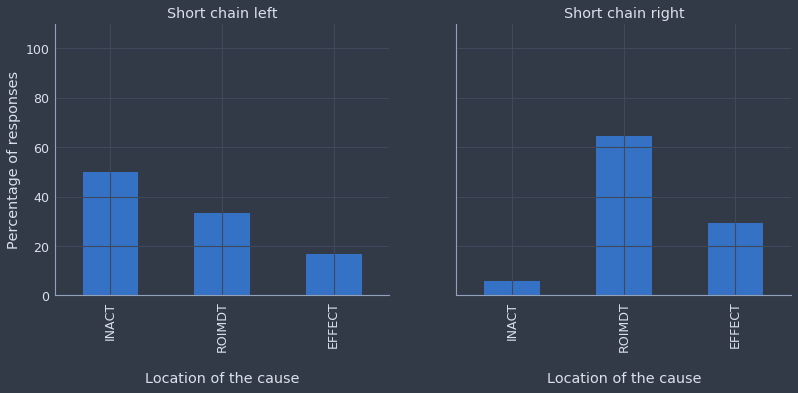

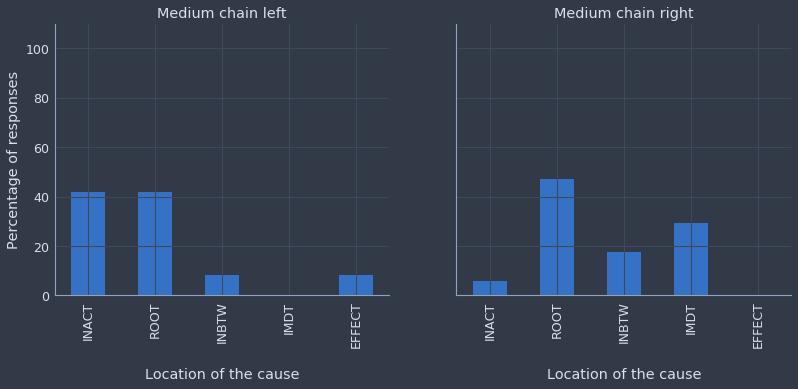

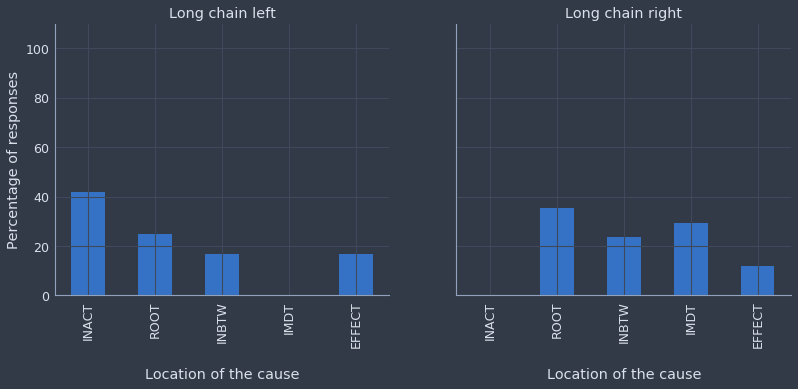

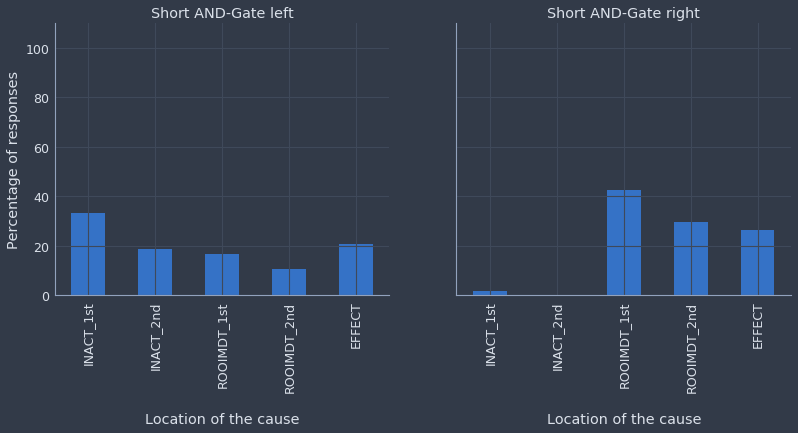

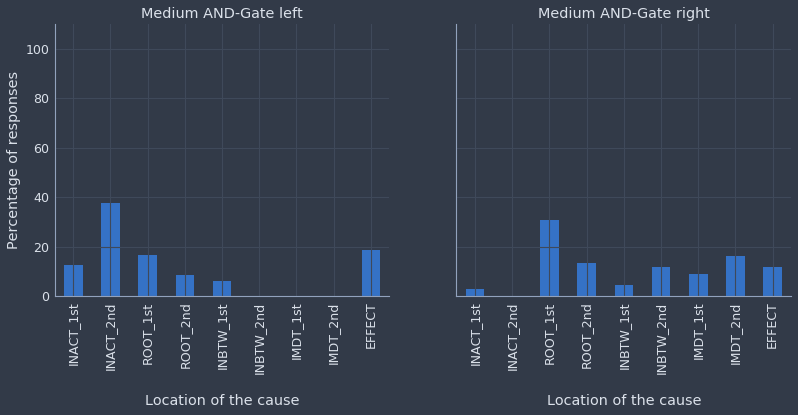

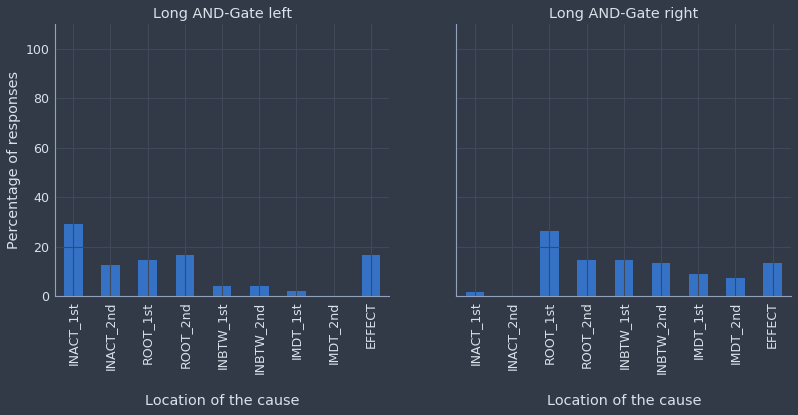

In [10]:
ChainShort_R = Chain("short").add_filter(sampling="right")
ChainMedium_R = Chain("medium").add_filter(sampling="right")
ChainLong_R = Chain("long").add_filter(sampling="right")
ChainShort_L = Chain("short").add_filter(sampling="left")
ChainMedium_L = Chain("medium").add_filter(sampling="left")
ChainLong_L = Chain("long").add_filter(sampling="left")
BranchShort_R = AndGate("short").add_filter(sampling="right")
BranchMedium_R = AndGate("medium").add_filter(sampling="right")
BranchLong_R = AndGate("long").add_filter(sampling="right")
BranchShort_L = AndGate("short").add_filter(sampling="left")
BranchMedium_L = AndGate("medium").add_filter(sampling="left")
BranchLong_L = AndGate("long").add_filter(sampling="left")

graph([ChainShort_L,ChainShort_R],["Short chain left","Short chain right"])
graph([ChainMedium_L,ChainMedium_R],["Medium chain left","Medium chain right"])
graph([ChainLong_L,ChainLong_R],["Long chain left","Long chain right"])
graph([BranchShort_L,BranchShort_R],["Short AND-Gate left","Short AND-Gate right"])
graph([BranchMedium_L,BranchMedium_R],["Medium AND-Gate left","Medium AND-Gate right"])
graph([BranchLong_L,BranchLong_R],["Long AND-Gate left","Long AND-Gate right"])

### Comparison Top *vs* Bottom

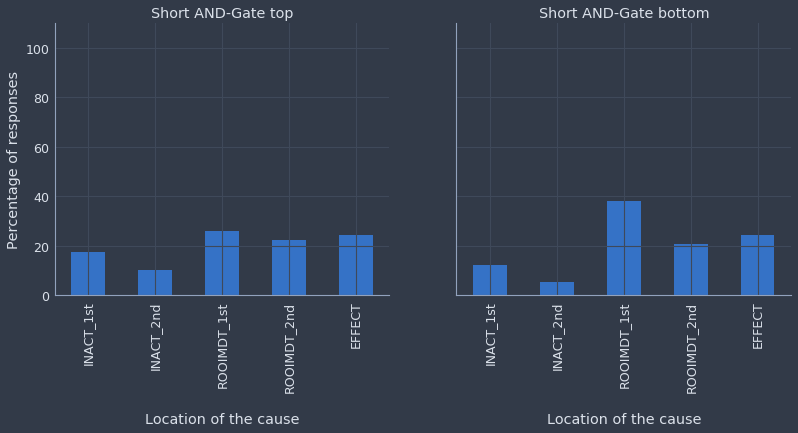

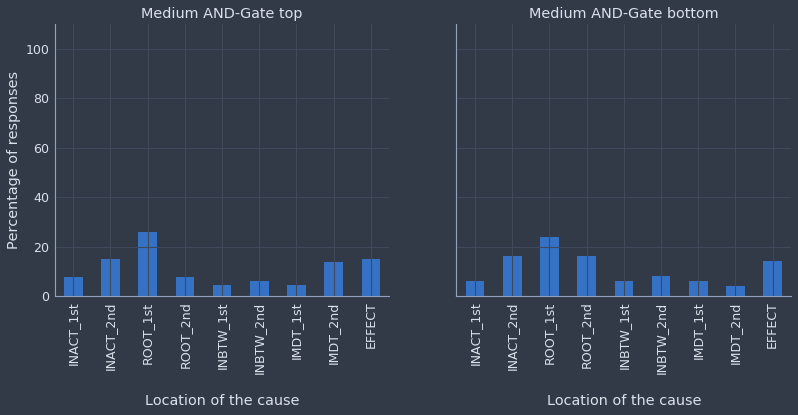

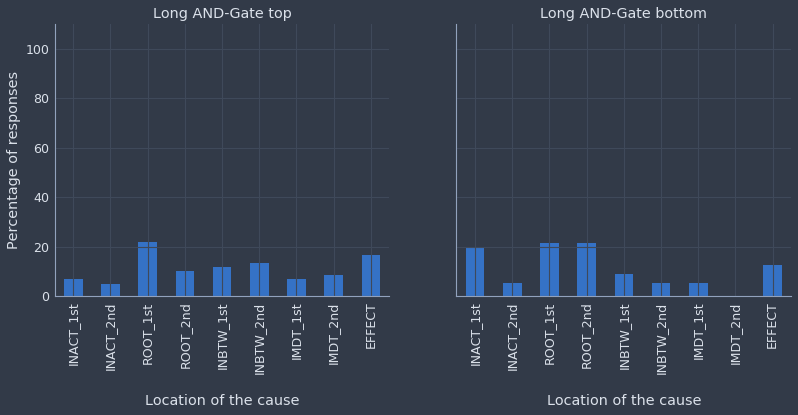

In [11]:
BranchShort_T = AndGate("short").add_filter(level="top")
BranchMedium_T = AndGate("medium").add_filter(level="top")
BranchLong_T = AndGate("long").add_filter(level="top")
BranchShort_B = AndGate("short").add_filter(level="bottom")
BranchMedium_B = AndGate("medium").add_filter(level="bottom")
BranchLong_B = AndGate("long").add_filter(level="bottom")

graph([BranchShort_T,BranchShort_B],["Short AND-Gate top","Short AND-Gate bottom"])
graph([BranchMedium_T,BranchMedium_B],["Medium AND-Gate top","Medium AND-Gate bottom"])
graph([BranchLong_T,BranchLong_B],["Long AND-Gate top","Long AND-Gate bottom"])

### General comparison

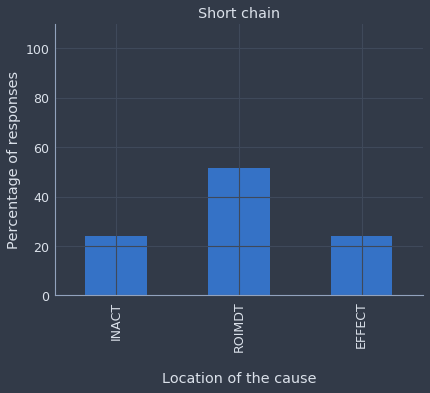

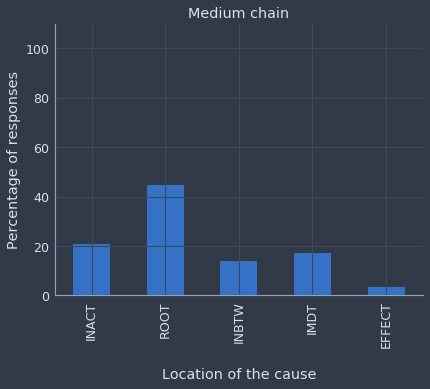

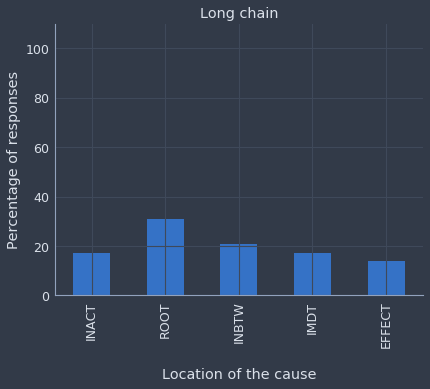

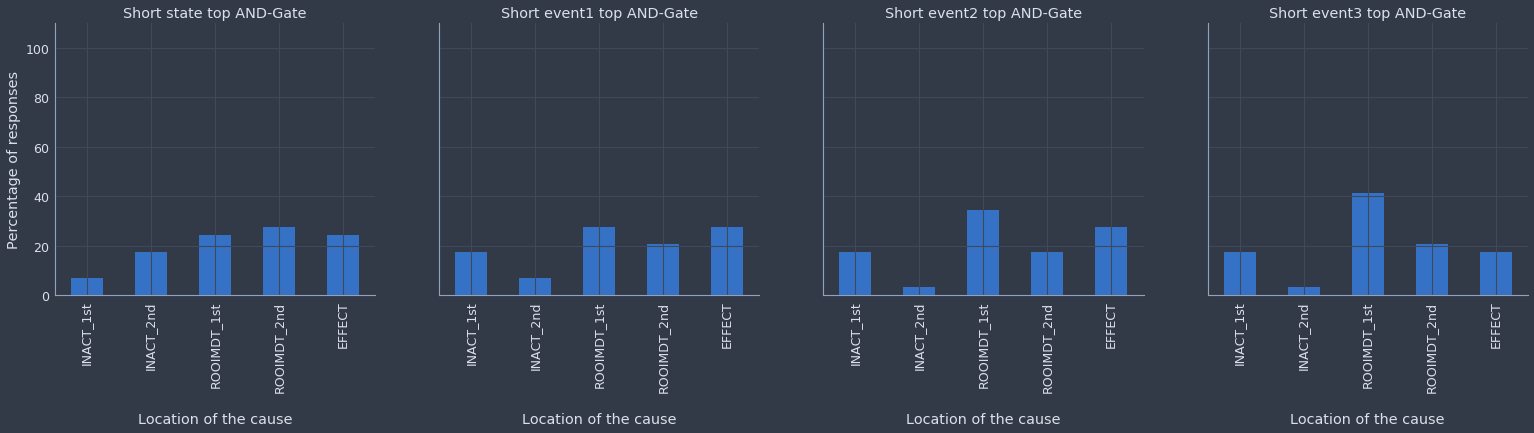

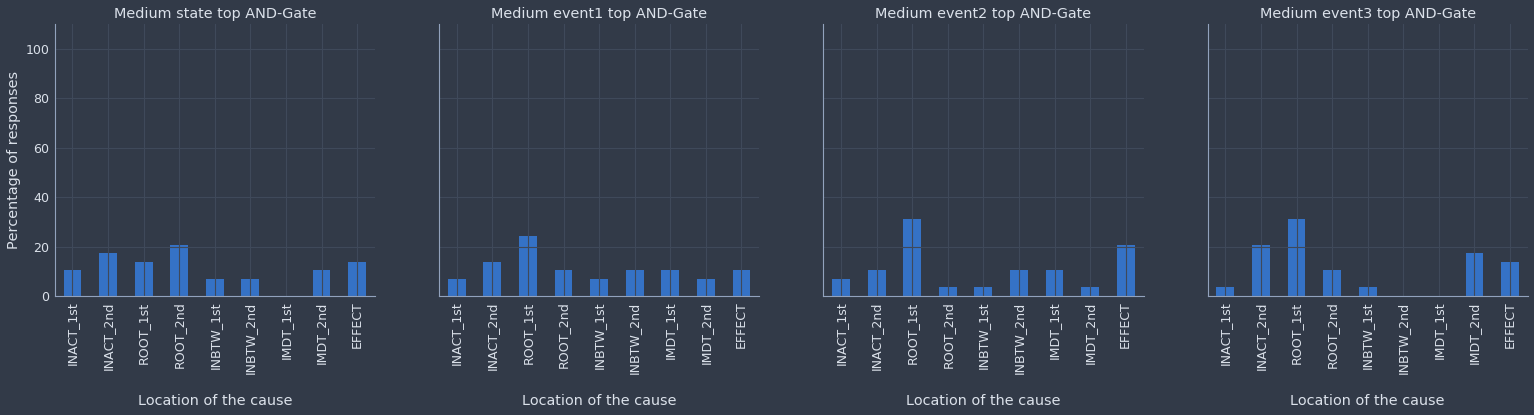

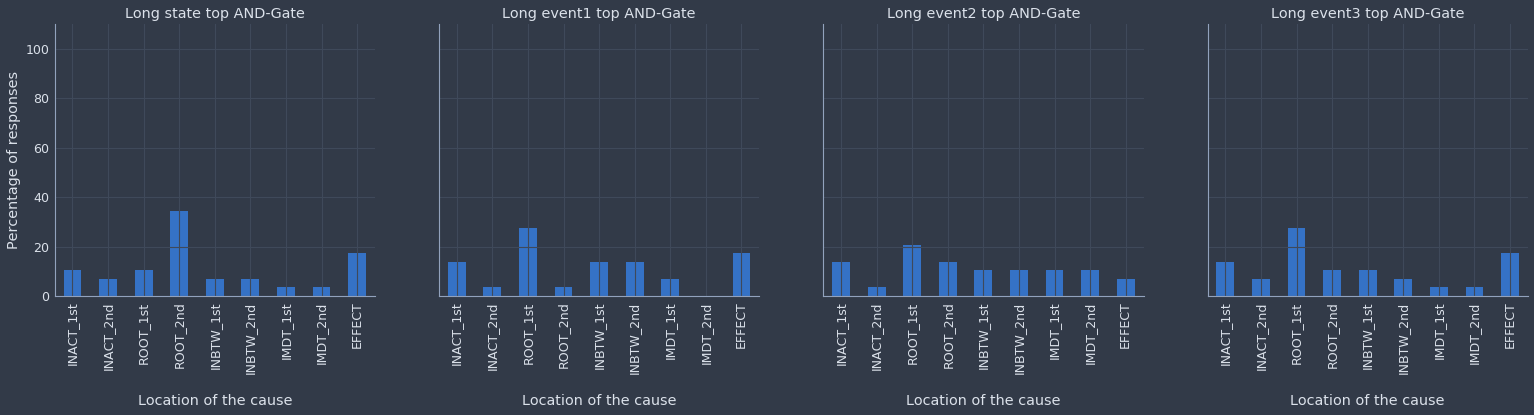

In [20]:
ChainShort = Chain("short").add_filter()
ChainMedium = Chain("medium").add_filter()
ChainLong = Chain("long").add_filter()
ShortState = AndGate("short").add_filter(delay=False)
MediumState = AndGate("medium").add_filter(delay=False)
LongState = AndGate("long").add_filter(delay=False)
ShortEvent1 = AndGate("short").add_filter(delay="short")
ShortEvent2 = AndGate("short").add_filter(delay="medium")
ShortEvent3 = AndGate("short").add_filter(delay="long")
MediumEvent1 = AndGate("medium").add_filter(delay="short")
MediumEvent2  = AndGate("medium").add_filter(delay="medium")
MediumEvent3 = AndGate("medium").add_filter(delay="long")
LongEvent1 = AndGate("long").add_filter(delay="short")
LongEvent2  = AndGate("long").add_filter(delay="medium")
LongEvent3 = AndGate("long").add_filter(delay="long")

graph([ChainShort],["Short chain"])
graph([ChainMedium],["Medium chain"])
graph([ChainLong],["Long chain"])
graph([ShortState,ShortEvent1,ShortEvent2,ShortEvent3],["Short state top AND-Gate","Short event1 top AND-Gate",
                                                        "Short event2 top AND-Gate","Short event3 top AND-Gate"])
graph([MediumState,MediumEvent1,MediumEvent2,MediumEvent3],["Medium state top AND-Gate","Medium event1 top AND-Gate",
                                                        "Medium event2 top AND-Gate","Medium event3 top AND-Gate"])
graph([LongState,LongEvent1,LongEvent2,LongEvent3],["Long state top AND-Gate","Long event1 top AND-Gate",
                                                        "Long event2 top AND-Gate","Long event3 top AND-Gate"])

In [21]:
MediumEvent3.node_category

,subject_id,rt,stimulus,sampling,nb_of_run,length,state_OR_event,branch_first,time_interval,node_selected,node_category
11,1,171543.490,branch_RTME3,Right,1.0,Medium,Event,Top,Long,node14,IMDT_2nd
18,2,16809.110,branch_LBME3,Left,1.0,Medium,Event,Bottom,Long,node2,INACT_2nd
31,3,15786.030,branch_RTME3,Right,1.0,Medium,Event,Top,Long,node5,ROOT_1st
40,4,39760.000,branch_LTME3,Left,1.0,Medium,Event,Top,Long,node10,INACT_2nd
57,5,14773.000,branch_RBME3,Right,1.0,Medium,Event,Bottom,Long,node7,IMDT_2nd
69,6,143449.000,branch_RTME3,Right,1.0,Medium,Event,Top,Long,node14,IMDT_2nd
81,7,14616.000,branch_LBME3,Left,1.0,Medium,Event,Bottom,Long,node3,INACT_2nd
91,8,15870.000,branch_LBME3,Left,1.0,Medium,Event,Bottom,Long,node12,ROOT_1st
98,9,16958.000,branch_LBME3,Left,1.0,Medium,Event,Bottom,Long,node13,INBTW_1st
115,10,17271.840,branch_LBME3,Left,1.0,Medium,Event,Bottom,Long,node15,EFFECT


In [22]:
MediumEvent3.node_category

INACT_1st     3.448276
INACT_2nd    20.689655
ROOT_1st     31.034483
ROOT_2nd     10.344828
INBTW_1st     3.448276
INBTW_2nd     0.000000
IMDT_1st      0.000000
IMDT_2nd     17.241379
EFFECT       13.793103
dtype: float64

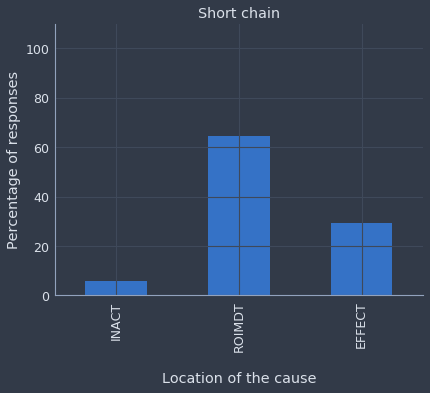

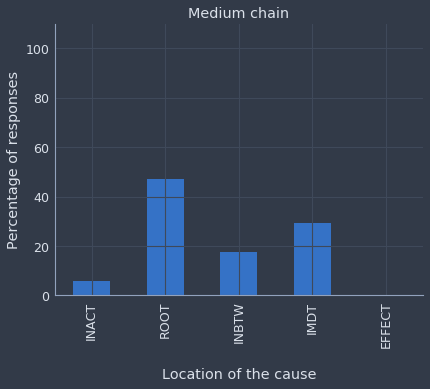

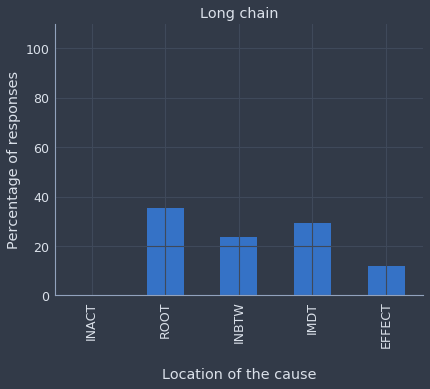

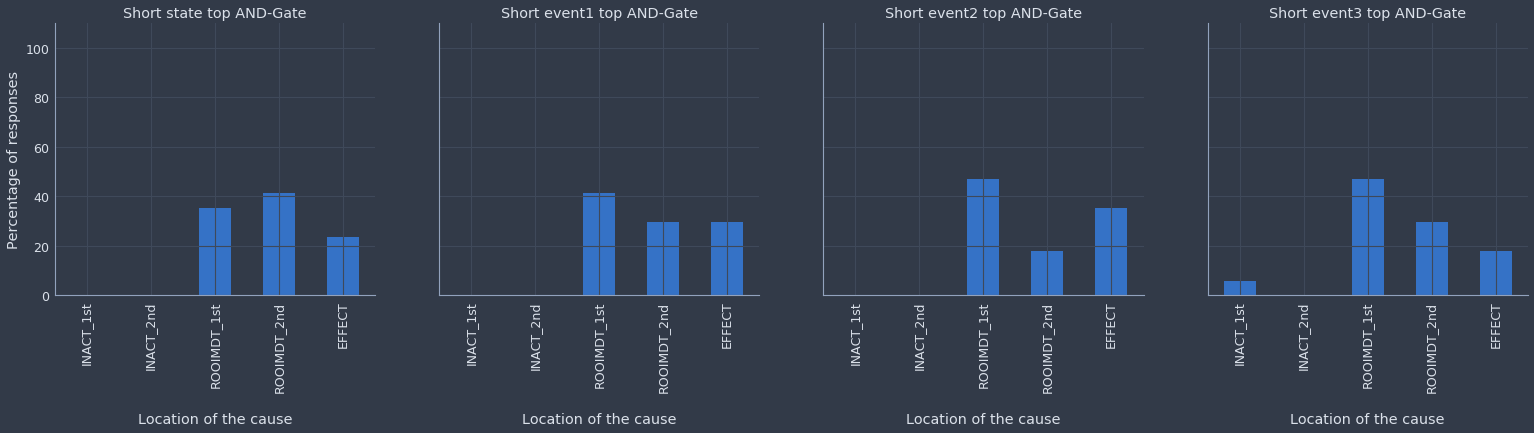

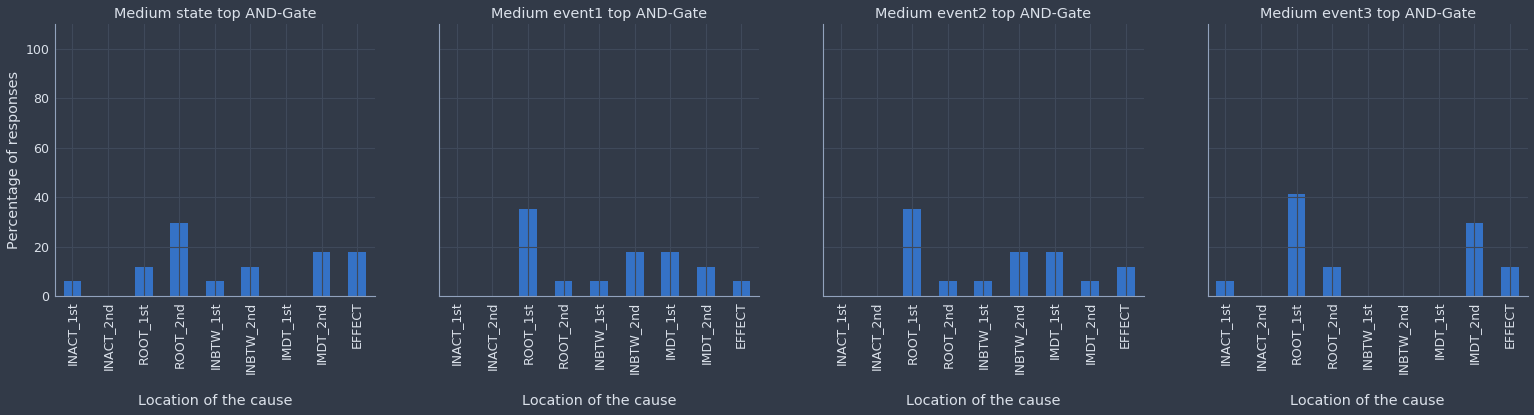

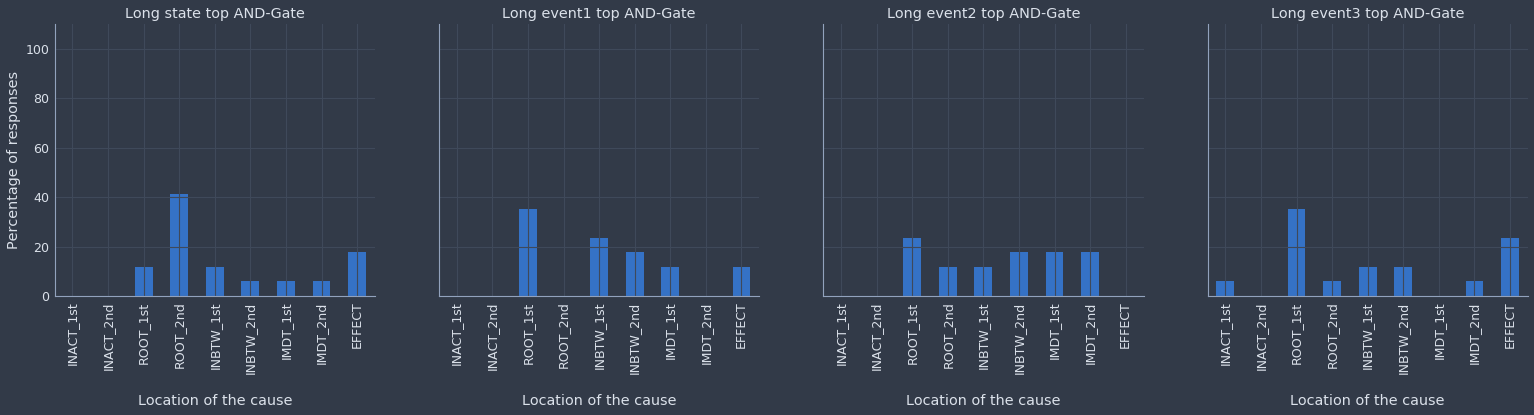

In [13]:
ChainShort = Chain("short").add_filter(sampling='right')
ChainMedium = Chain("medium").add_filter(sampling='right')
ChainLong = Chain("long").add_filter(sampling='right')
ShortState = AndGate("short").add_filter(sampling='right',delay=False)
MediumState = AndGate("medium").add_filter(sampling='right',delay=False)
LongState = AndGate("long").add_filter(sampling='right',delay=False)
ShortEvent1 = AndGate("short").add_filter(sampling='right',delay="short")
ShortEvent2 = AndGate("short").add_filter(sampling='right',delay="medium")
ShortEvent3 = AndGate("short").add_filter(sampling='right',delay="long")
MediumEvent1 = AndGate("medium").add_filter(sampling='right',delay="short")
MediumEvent2  = AndGate("medium").add_filter(sampling='right',delay="medium")
MediumEvent3 = AndGate("medium").add_filter(sampling='right',delay="long")
LongEvent1 = AndGate("long").add_filter(sampling='right',delay="short")
LongEvent2  = AndGate("long").add_filter(sampling='right',delay="medium")
LongEvent3 = AndGate("long").add_filter(sampling='right',delay="long")

graph([ChainShort],["Short chain"])
graph([ChainMedium],["Medium chain"])
graph([ChainLong],["Long chain"])
graph([ShortState,ShortEvent1,ShortEvent2,ShortEvent3],["Short state top AND-Gate","Short event1 top AND-Gate",
                                                        "Short event2 top AND-Gate","Short event3 top AND-Gate"])
graph([MediumState,MediumEvent1,MediumEvent2,MediumEvent3],["Medium state top AND-Gate","Medium event1 top AND-Gate",
                                                        "Medium event2 top AND-Gate","Medium event3 top AND-Gate"])
graph([LongState,LongEvent1,LongEvent2,LongEvent3],["Long state top AND-Gate","Long event1 top AND-Gate",
                                                        "Long event2 top AND-Gate","Long event3 top AND-Gate"])

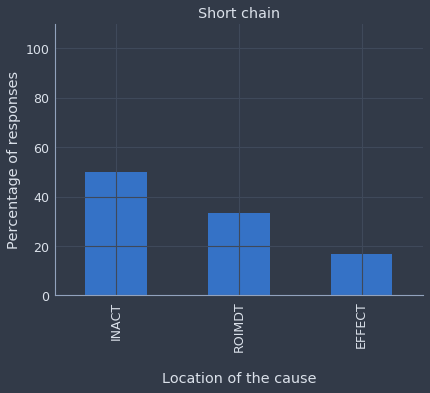

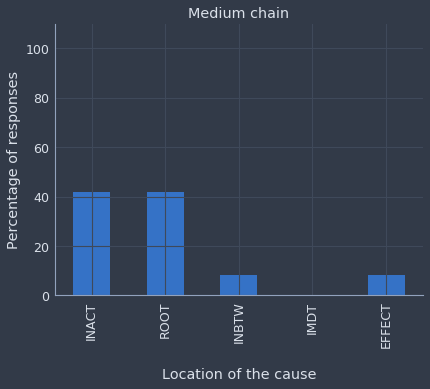

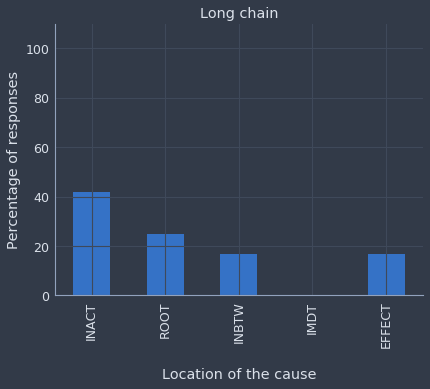

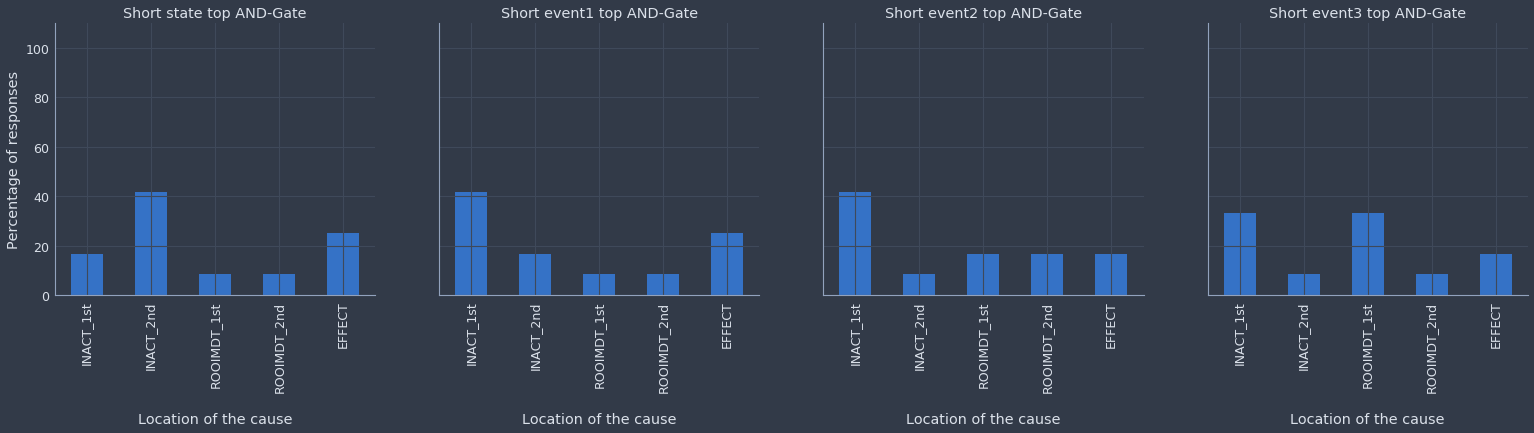

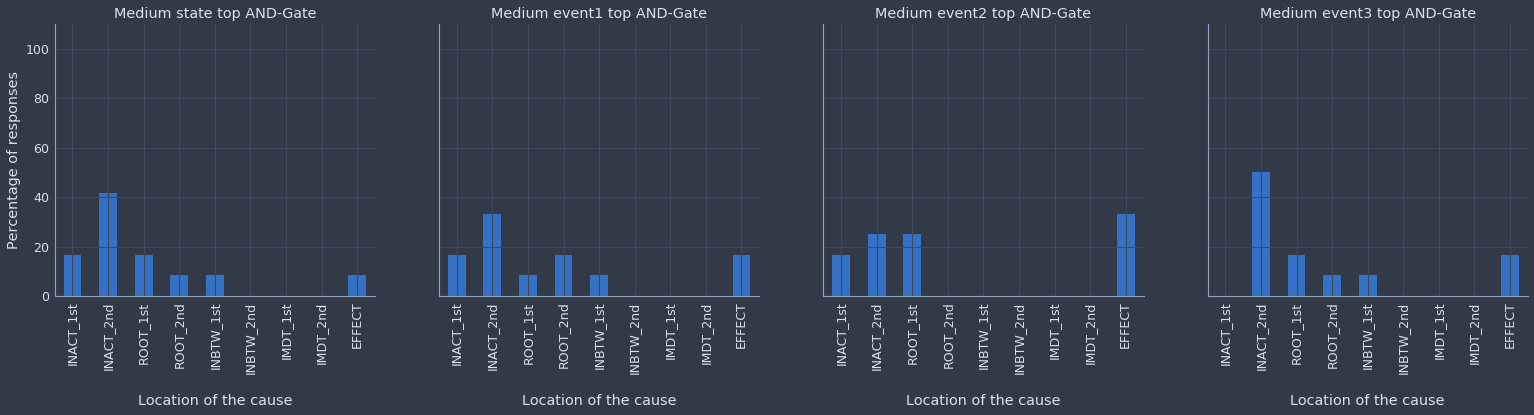

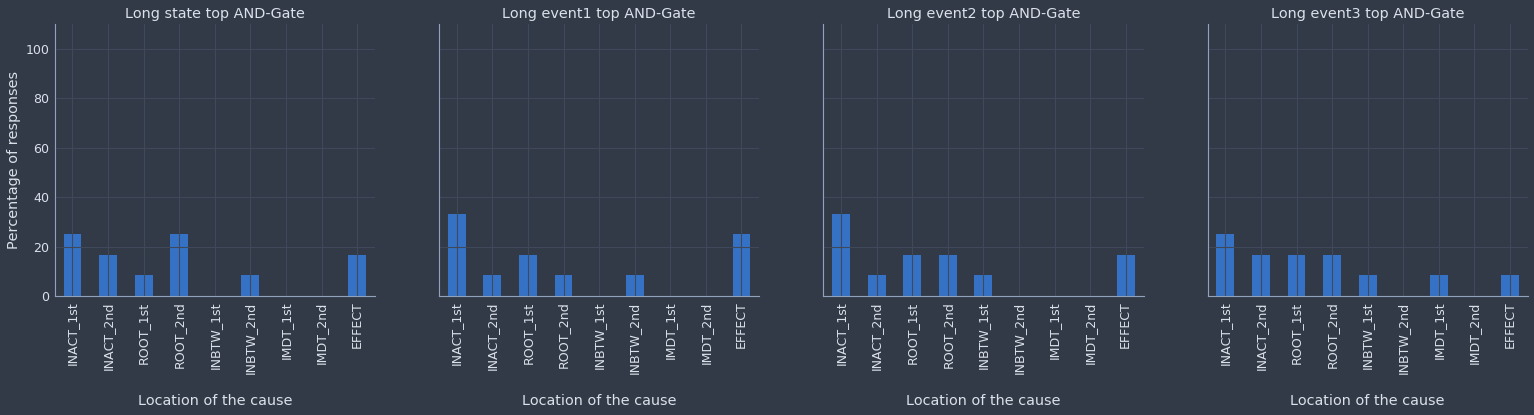

In [14]:
ChainShort = Chain("short").add_filter(sampling='left')
ChainMedium = Chain("medium").add_filter(sampling='left')
ChainLong = Chain("long").add_filter(sampling='left')
ShortState = AndGate("short").add_filter(sampling='left',delay=False)
MediumState = AndGate("medium").add_filter(sampling='left',delay=False)
LongState = AndGate("long").add_filter(sampling='left',delay=False)
ShortEvent1 = AndGate("short").add_filter(sampling='left',delay="short")
ShortEvent2 = AndGate("short").add_filter(sampling='left',delay="medium")
ShortEvent3 = AndGate("short").add_filter(sampling='left',delay="long")
MediumEvent1 = AndGate("medium").add_filter(sampling='left',delay="short")
MediumEvent2  = AndGate("medium").add_filter(sampling='left',delay="medium")
MediumEvent3 = AndGate("medium").add_filter(sampling='left',delay="long")
LongEvent1 = AndGate("long").add_filter(sampling='left',delay="short")
LongEvent2  = AndGate("long").add_filter(sampling='left',delay="medium")
LongEvent3 = AndGate("long").add_filter(sampling='left',delay="long")

graph([ChainShort],["Short chain"])
graph([ChainMedium],["Medium chain"])
graph([ChainLong],["Long chain"])
graph([ShortState,ShortEvent1,ShortEvent2,ShortEvent3],["Short state top AND-Gate","Short event1 top AND-Gate",
                                                        "Short event2 top AND-Gate","Short event3 top AND-Gate"])
graph([MediumState,MediumEvent1,MediumEvent2,MediumEvent3],["Medium state top AND-Gate","Medium event1 top AND-Gate",
                                                        "Medium event2 top AND-Gate","Medium event3 top AND-Gate"])
graph([LongState,LongEvent1,LongEvent2,LongEvent3],["Long state top AND-Gate","Long event1 top AND-Gate",
                                                        "Long event2 top AND-Gate","Long event3 top AND-Gate"])